# Smart Flow FT5009 Ultimate - MACD & RSI

# 1.0 Setup

## 1.1 Import library

In [1]:
# System
from functools import partial

# EDA
import numpy as np
import pandas as pd

# Data source
import yfinance as yf

In [2]:
# User defined
import constants
from portfolio import BacktestPortfolio

In [3]:
# Suppress pandas warning
pd.options.mode.chained_assignment = None

# 2.0 Load data

In [4]:
read_csv = partial(pd.read_csv, parse_dates=['published date'], index_col='published date')

In [5]:
inst_sell = read_csv(constants.inst_sell_file)
retail_sell = read_csv(constants.retail_sell_file)

# 3.0 Backtesting

In [6]:
backtest = BacktestPortfolio('Ultimate Portfolio')
backtest_info = backtest.gen_trade_list_info([retail_sell, inst_sell])

[*********************100%***********************]  116 of 116 completed


c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_re

[*********************100%***********************]  104 of 104 completed


c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_return_info = pd.DataFrame(weekly_return.loc[beg_dt, this_week_position_tickers])
c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:78: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  weekly_re

Remove duplicated stock that institution and retail recommended at the same week

In [7]:
backtest_info = backtest_info.reset_index().drop_duplicates(['published date', 'stock code']).set_index('published date')

Overview of the all available stock to select

In [8]:
backtest_info.head()

,stock code,stock,net amount (S$M),entry_date,entry_price,exit_date,exit_price,pct_change
published date,,,,,,,,
2019-01-07,Y92.SI,Thai Beverage,-3.930021,2019-01-07,0.025513,2019-01-11,0.02821,0.105691
2019-01-07,AXB.SI,Yongnam Holdings,-2.211231,2019-01-07,0.185,2019-01-11,0.189,0.021622
2019-01-07,J36.SI,Jardine Matheson,-2.022918,2019-01-07,60.090973,2019-01-11,59.740067,-0.00584
2019-01-07,CJLU.SI,NetLink NBN Trust,-1.514398,2019-01-07,0.620599,2019-01-11,0.620599,0.0
2019-01-07,CC3.SI,StarHub,-1.125573,2019-01-07,1.444184,2019-01-11,1.452389,0.005682


In [9]:
ticker_list = backtest_info['stock code'].unique().tolist()
ticker_info = yf.download(ticker_list, start='2018-01-01', end='2022-11-10')

adj_close_info = ticker_info['Adj Close']

[*********************100%***********************]  134 of 134 completed


In [10]:
adj_close_info.head()

,1D1.SI,1F3.SI,1J4.SI,42U.SI,544.SI,546.SI,558.SI,579.SI,5CP.SI,5DM.SI,...,V03.SI,V3M.SI,VC2.SI,W05.SI,XZL.SI,Y92.SI,YF8.SI,Z25.SI,Z59.SI,Z74.SI
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+08:00,0.490,0.194252,0.144,0.017998,0.273679,0.043993,0.706495,0.009,0.506422,0.151,...,16.841305,0.15,1.579393,2.118401,NaN,0.014737,NaN,1.335566,0.536250,2.861706
2018-01-03 00:00:00+08:00,0.485,0.194252,0.140,0.017998,0.277378,0.043095,0.706495,0.009,0.506422,0.153,...,17.368092,0.15,1.556166,2.109191,NaN,0.014737,NaN,1.382156,0.536250,2.853756
2018-01-04 00:00:00+08:00,0.485,0.194252,0.140,0.017998,0.281076,0.043993,0.713037,0.009,0.506422,0.150,...,17.273741,0.15,1.579393,2.127612,NaN,0.014576,NaN,1.335566,0.531285,2.869654
2018-01-05 00:00:00+08:00,0.485,0.194252,0.148,0.017998,0.273679,0.043993,0.699953,0.010,0.506422,0.150,...,17.061457,0.20,1.579393,2.136822,NaN,0.014656,NaN,1.343331,0.536250,2.861706
2018-01-08 00:00:00+08:00,0.490,0.194252,0.140,0.017998,0.277378,0.043095,0.706495,0.010,0.502056,0.151,...,16.864895,0.20,1.641329,2.127612,NaN,0.014737,NaN,1.351096,0.536250,2.885553


## MACD & RSI

### Generate trade signal

In [11]:
def macd(df: pd.DataFrame, close_col='adj close'):
    def macd_trading_signal(macd, macd_sl):
        return 1 if macd > macd_sl else -1

    fast = 12
    slow = 26
    sl = 9

    # Get the 12-day EMA of the closing price
    df['macd_slow'] = df[close_col].ewm(span=fast, adjust=False, min_periods=fast).mean()

    # Get the 26-day EMA of the closing price
    df['macd_fast'] = df[close_col].ewm(span=slow, adjust=False, min_periods=slow).mean()

    # MACD = 26-day EMA - 12-day EMA
    df['macd'] = df['macd_fast'] - df['macd_slow']

    # Get the 9-day EMA of the MACD for the trigger line
    df['macd_sl'] = df['macd'].ewm(span=sl, adjust=False, min_periods=sl).mean()

    df[close_col] = df[['macd', 'macd_sl']].apply(lambda df: macd_trading_signal(df['macd'], df['macd_sl']), axis=1)

    return df[close_col]

def rsi(series: pd.Series, periods = 14):
    def rsi_trading_signal(rsi_value):
        if rsi_value <= 40:
            return -1
        elif rsi_value >= 60:
            return 1
        else:
            return 0

    close_delta = series.diff()

    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100 / (1 + rsi))

    rsi_trading_decision = rsi.apply(rsi_trading_signal)

    return rsi_trading_decision

# if signals diverge then no action will be taken
# else follows the signal
def get_finalise_trading_signal(rsi, macd):
    if rsi != macd and rsi != 0:
        return 0
    
    return macd

In [12]:
rsi_list = []
macd_list = []

for ticker in ticker_list:
    adj_close = adj_close_info[[ticker]]
    adj_close_col_name = adj_close.columns[0]

    rsi_list.append(rsi(adj_close[adj_close_col_name]))
    macd_list.append(macd(adj_close, adj_close_col_name))

In [13]:
rsi_info = pd.DataFrame(rsi_list).T
macd_info = pd.DataFrame(macd_list).T

### Create trade position

In [14]:
trade_selection = backtest_info.copy()

trading_days = trade_selection.sort_index().index.unique()

In [15]:
selected_stocks_list = []

for day in trading_days:
    this_week_available = trade_selection.loc[day]
    tickers = this_week_available['stock code'].tolist()

    nearest_date_index = rsi_info.index.get_loc(day, method='nearest')
    rsi_selection = rsi_info.iloc[nearest_date_index][tickers]
    rsi_selection.name = 'rsi'
    macd_selection = macd_info.iloc[nearest_date_index][tickers]
    macd_selection.name = 'macd'

    technical_indicators = rsi_selection.to_frame().merge(macd_selection.to_frame(), left_index=True, right_index=True)
    technical_indicators['position'] = technical_indicators.apply(lambda df: get_finalise_trading_signal(df['rsi'], df['macd']), axis=1)
    technical_indicators = technical_indicators[technical_indicators['position'] != 0]
    selected_stocks = technical_indicators.index

    this_week_selected_stocks = this_week_available.reset_index().set_index('stock code').T[selected_stocks].T
    this_week_selected_stocks = this_week_selected_stocks.merge(technical_indicators[['position']], left_index=True, right_index=True)
    this_week_selected_stocks.index.name = 'stock code'
    this_week_selected_stocks = this_week_selected_stocks.reset_index()

    selected_stocks_list.append(this_week_selected_stocks)

C:\Users\evely\AppData\Local\Temp\ipykernel_14356\3691916065.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  nearest_date_index = rsi_info.index.get_loc(day, method='nearest')
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\3691916065.py:7: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  nearest_date_index = rsi_info.index.get_loc(day, method='nearest')
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\3691916065.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  nearest_date_index = rsi_info.index.get_loc(day, method='nearest')
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\3691916065.py:7: Futur

In [16]:
trade_info = pd.concat(selected_stocks_list)
trade_info = trade_info.set_index('published date')
trade_info = trade_info.sort_index()

In [17]:
backtest_hist = backtest.calc_port_ret(trade_info)
back_weekly_summary_hist = backtest.get_weekly_summary_trade_hist()

c:\Users\evely\Downloads\FT5009-Project\FT5009-Project\FT5009-Project\portfolio.py:148: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.DataFrame(self.__weekly_summary_trade)


In [18]:
backtest.port_performance()

[*********************100%***********************]  1 of 1 completed
--- Ultimate Portfolio ---
Portfolio value: $ 110,978.47
Portfolio return: 13.02%
Averge weekly return: 0.07%
Volatility weekly return: 1.62%
Annualized volatility: 0.92
Sharpe Ratio: 0.14
Sharpe Ratio: 0.22
Maximum drawdown: -0.19


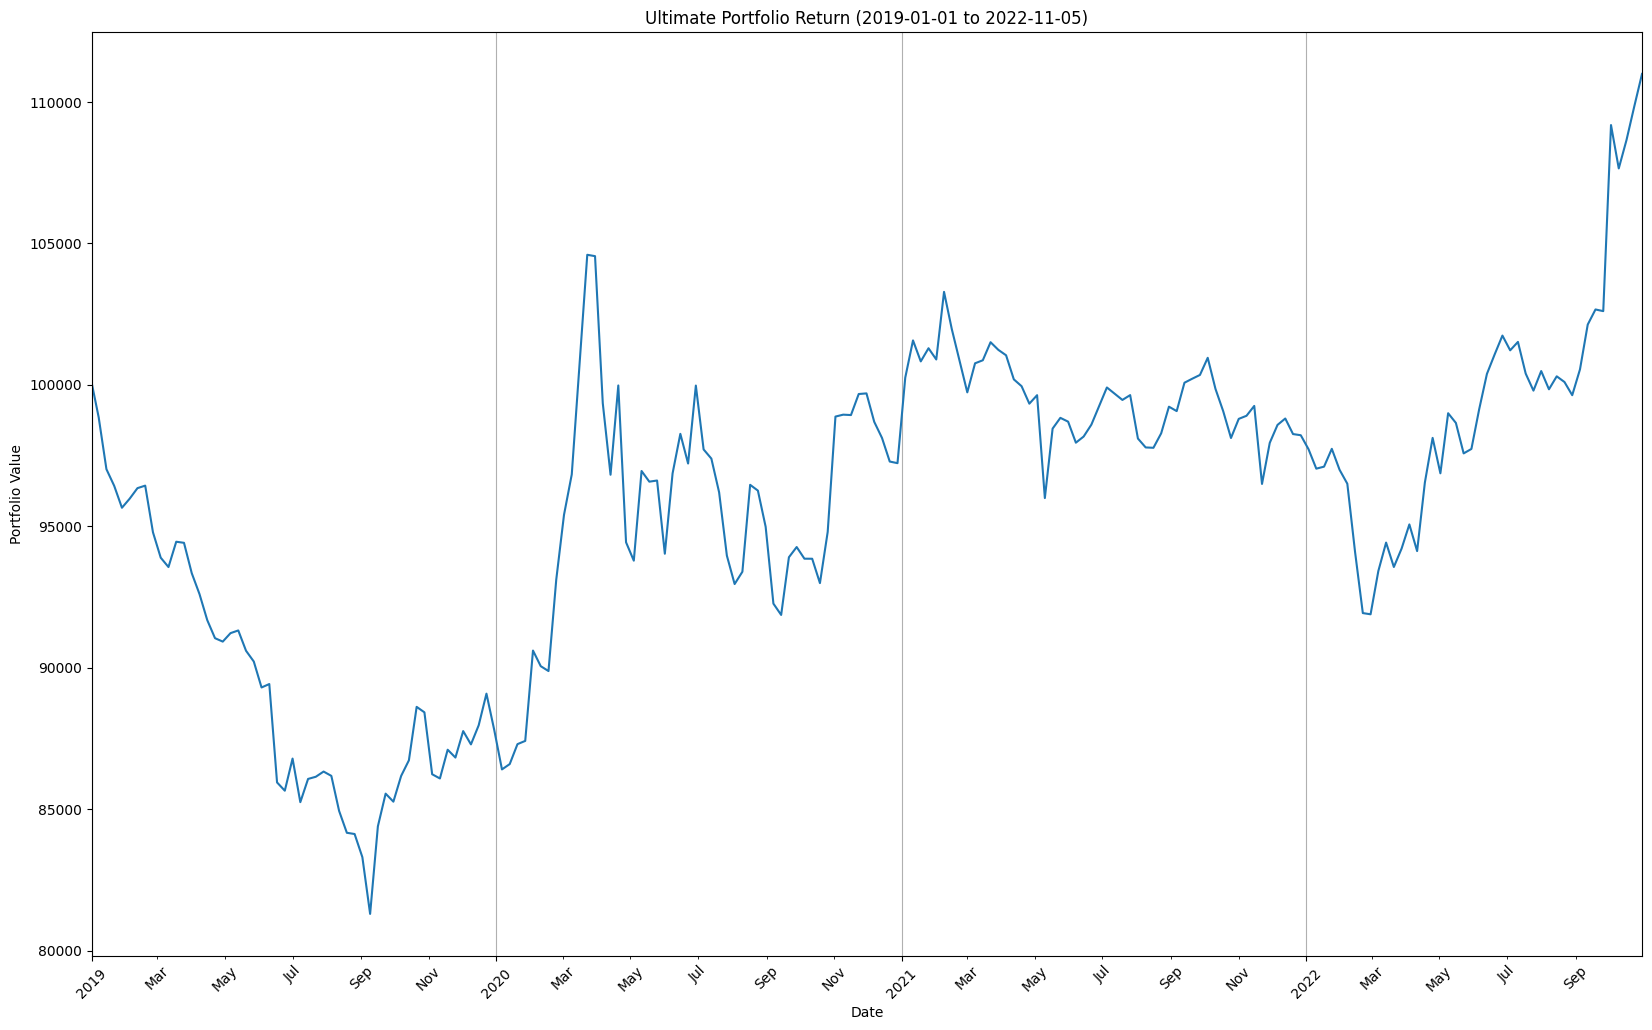

In [19]:
backtest.plot_weekly_port_value()

# Smart Flow FT5009 Ultimate - Bias Ratio

## Fetch Data

In [20]:
df = adj_close_info
df.index = pd.to_datetime(df.index)
df = df.fillna(0)

## Generate trade signal

In [21]:
#10-day and 25-day bias ratio
def bias_ratio(ticker):
    pos = 0
    for i in range(187):
        start = 28 + 5*i
        MA_10 = df[ticker][start-9 : start+1].mean()
        MA_25 = df[ticker][start-24 : start+1].mean()
        bias_10 = ((df[ticker][start] - MA_10)/MA_10) * 100
        bias_25 = ((df[ticker][start] - MA_25)/MA_25) * 100
        if bias_10 < -7.25 and bias_25 < -10.25: pos = 1
        elif bias_10 > 8.25 and bias_25 > 11.25: pos = -1
        week[ticker][i] = pos

## Create Trade Position

In [22]:
week = pd.DataFrame(columns=list(df.columns))
total_week = 187
week = week.append([0 for i in range(total_week)]) 
week = week.drop(0, axis=1)

for stock in list(df.columns):
    bias_ratio(stock)

week.head()

C:\Users\evely\AppData\Local\Temp\ipykernel_14356\4279290422.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append([0 for i in range(total_week)])
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\320509058.py:8: RuntimeWarning: invalid value encountered in scalar divide
  bias_10 = ((df[ticker][start] - MA_10)/MA_10) * 100
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\320509058.py:9: RuntimeWarning: invalid value encountered in scalar divide
  bias_25 = ((df[ticker][start] - MA_25)/MA_25) * 100


,1D1.SI,1F3.SI,1J4.SI,42U.SI,544.SI,546.SI,558.SI,579.SI,5CP.SI,5DM.SI,...,V03.SI,V3M.SI,VC2.SI,W05.SI,XZL.SI,Y92.SI,YF8.SI,Z25.SI,Z59.SI,Z74.SI
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,-1,0,0,0,-1,0,0,0,0
2,0,0,-1,0,0,0,0,0,0,1,...,-1,-1,0,0,0,-1,0,0,0,0
3,0,0,-1,1,0,0,0,0,0,1,...,-1,1,0,0,0,-1,0,0,0,0
4,-1,0,-1,1,0,0,-1,0,0,1,...,-1,1,0,0,0,-1,0,0,0,0


## Calculate return

In [23]:
def get_profit(n_week):
    profit = 0
    start = 28 + 5*n_week
    for stock in list(df.columns):
        if week[stock][n_week] == 1: profit += df[stock][start+4] - df[stock][start]
        elif week[stock][n_week] == -1: profit += df[stock][start] - df[stock][start+4]
    return profit

def get_ret(profit, n_week):
    cost = 0
    start = 28 + 5*n_week
    for stock in list(df.columns):
        if week[stock][n_week] == 1 or -1: cost += df[stock][start]
    ret = profit/cost
    return ret

profit_list = []
for i in range(187):
    profit_list.append(get_profit(i))
return_list = []
for i in range(187):
    return_list.append(get_ret(profit_list[i], i))
    
week.insert(134, "profit", profit_list, allow_duplicates=True)
week.insert(135, "return", return_list, allow_duplicates=True)

## Performance Metrices

In [24]:
def get_pos_cum_daily_return(df, pos_ret_col = 'return'):
    df['cum_return'] = (1 + df[pos_ret_col]).cumprod()
    cum_ret = df.iloc[-1]['cum_return']

    return df, cum_ret

def maximum_drawdown(net_return):
    #Incredily clean solution found on stack overflow
    cum_return = (1 + net_return).cumprod()
    i = np.argmax(np.maximum.accumulate(cum_return) - cum_return) # end of the period
    j = np.argmax(cum_return[:i]) # start of period
    return (cum_return[i]-cum_return[j])/cum_return[j]

week, prof_cum_ret = get_pos_cum_daily_return(week)

us_treasury_yield_ticker = '^TNX'
us_treasury_yield = yf.download(us_treasury_yield_ticker, start="2019-01-01", end="2022-10-31")
RISK_FREE_RATE = (us_treasury_yield['Adj Close'] / 100).mean()

print('--- Performance Metrices of Bias Ratio Strategy ---')
print(f'cumulative return: {prof_cum_ret}')
print('Annualized volatility: ', week['return'].std()* 252**0.5)
print('Sharpe Ratio: ', (week['return'].mean()*252 - RISK_FREE_RATE)/(week['return'].std()* 252 ** 0.5) )
print('Sortino Ratio: ', (week['return'].mean()*252 - RISK_FREE_RATE)/(week['return'][week['return'] < 0].std()* 252**0.5) )
print('Maximum drawdown: ', maximum_drawdown(week['return']))

[*********************100%***********************]  1 of 1 completed
--- Performance Metrices of Bias Ratio Strategy ---
cumulative return: 1.0842852411231518
Annualized volatility:  0.15453077904426069
Sharpe Ratio:  0.6678796553977765
Sortino Ratio:  0.9371808380481406
Maximum drawdown:  -0.08592918192988422


Text(0, 0.5, 'return')

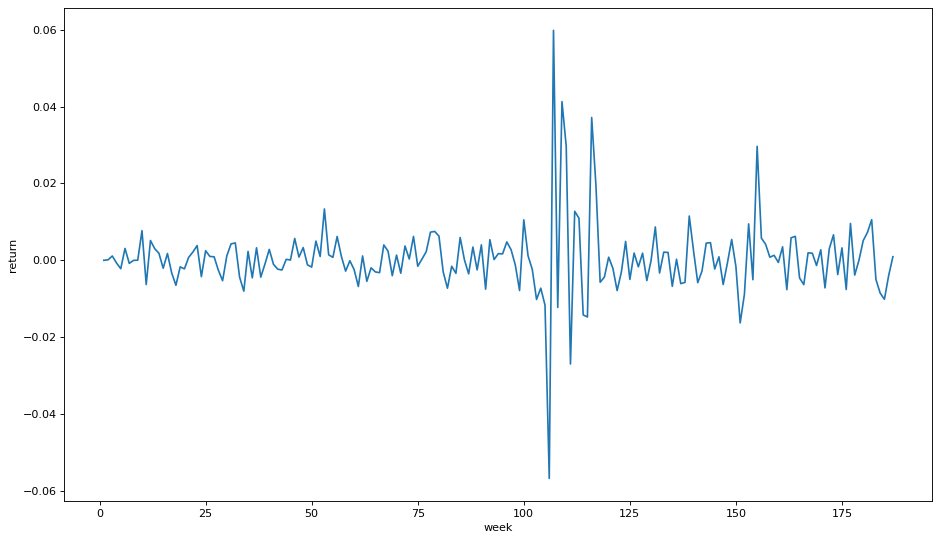

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)
x = [i for i in range(1, 188)]
plt.plot(x, week['return'])
plt.xlabel("week")
plt.ylabel("return")

# Smart Flow FT5009 Ultimate - Aroon

## Fetch Data

In [26]:
# ticker_info = yf.download(ticker_list, start='2018-01-01', end='2022-11-10')
stocks_data = ticker_info.iloc[:-1].sort_index()
stocks_data.columns = stocks_data.columns.swaplevel(0, 1)
stocks_data.sort_index(axis=1, level=0, inplace=True)
stocks_data.head()

1D1.SI                                       \
                          Adj Close  Close   High    Low   Open   Volume   
Date                                                                       
2018-01-02 00:00:00+08:00     0.490  0.490  0.500  0.480  0.490  1397300   
2018-01-03 00:00:00+08:00     0.485  0.485  0.495  0.485  0.490   944200   
2018-01-04 00:00:00+08:00     0.485  0.485  0.495  0.485  0.485  1031100   
2018-01-05 00:00:00+08:00     0.485  0.485  0.495  0.485  0.490   590100   
2018-01-08 00:00:00+08:00     0.490  0.490  0.495  0.485  0.485  1145400   

                             1F3.SI                  ... Z59.SI                \
                          Adj Close Close High  Low  ...   High    Low   Open   
Date                                                 ...                        
2018-01-02 00:00:00+08:00  0.194252   0.2  0.2  0.2  ...  0.545  0.530  0.540   
2018-01-03 00:00:00+08:00  0.194252   0.2  0.2  0.2  ...  0.540  0.535  0.535   
2018-01-04 00:00:00+08:00  0.194252   0.2  0.2  0.2  ...  0.540  0.535  0.540   
2018-01-05 00:00:00+08:00  0.194252   0.2  0.2  0.2  ...  0.545  0.535  0.540   
2018-01-08 00:00:00+08:00  0.194252   0.2  0.2  0.2  ...  0.550  0.540  0.540   

                                      Z74.SI                                    
                            Volume Adj Close Close  High   Low  Open    Volume  
Date                                                                            
2018-01-02 00:00:00+08:00  5991600  2.861706  3.60  3.61  3.57  3.58  19718200  
2018-01-03 00:00:00+08:00   481100  2.853756  3.59  3.61  3.59  3.60  15371400  
2018-01-04 00:00:00+08:00   905000  2.869654  3.61  3.61  3.59  3.61  29020100  
2018-01-05 00:00:00+08:00  5388700  2.861706  3.60  3.62  3.60  3.61  25692943  
2018-01-08 00:00:00+08:00  4948400  2.885553  3.63  3.63  3.61  3.62  11292000  

[5 rows x 804 columns]

In [27]:
stocks_data.columns

MultiIndex([('1D1.SI', 'Adj Close'),
            ('1D1.SI',     'Close'),
            ('1D1.SI',      'High'),
            ('1D1.SI',       'Low'),
            ('1D1.SI',      'Open'),
            ('1D1.SI',    'Volume'),
            ('1F3.SI', 'Adj Close'),
            ('1F3.SI',     'Close'),
            ('1F3.SI',      'High'),
            ('1F3.SI',       'Low'),
            ...
            ('Z59.SI',      'High'),
            ('Z59.SI',       'Low'),
            ('Z59.SI',      'Open'),
            ('Z59.SI',    'Volume'),
            ('Z74.SI', 'Adj Close'),
            ('Z74.SI',     'Close'),
            ('Z74.SI',      'High'),
            ('Z74.SI',       'Low'),
            ('Z74.SI',      'Open'),
            ('Z74.SI',    'Volume')],
           length=804)

## Generate trade signal

In [28]:
def aroon(stocks_data, ticker, day, signals):
    
    stocks_data[ticker, 'aroon_bull'] = 100 * stocks_data[ticker]['High'].rolling(day).apply(lambda x: x.argmax()) / (day)
    # stocks_data = stocks_data.sort_index(axis=1)
    stocks_data[ticker, 'aroon_bear'] = 100 * stocks_data[ticker]['Low'].rolling(day).apply(lambda x: x.argmin()) / (day)
    stocks_data = stocks_data.sort_index(axis=1)
    signal = []

    flag = -1 #Tracks changes in signals
    
    #Loop through the length of the entire dataset 
    for i in range(len(stocks_data[ticker]['Close'])):
        if stocks_data[ticker]['aroon_bull'][i] > stocks_data[ticker]['aroon_bear'][i]:
            if flag != 1: 
                signal.append(1)
                flag = 1 #set flag to 1 indicating a bullish signal
            else: 
                signal.append(0)
        elif stocks_data[ticker]['aroon_bull'][i] < stocks_data[ticker]['aroon_bear'][i]:
            if flag != 0:
                signal.append(-1)
                flag = 0 #set flag to 0 indicating bearish signal
            else:
                signal.append(0)
        else:
            signal.append(0)

    signals[ticker] = signal

## Create Trade Position

In [29]:
signals = pd.DataFrame()

In [30]:
for stock in ticker_list:
    aroon(stocks_data, stock, 25, signals)

C:\Users\evely\AppData\Local\Temp\ipykernel_14356\590091415.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signals[ticker] = signal
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\590091415.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  signals[ticker] = signal
C:\Users\evely\AppData\Local\Temp\ipykernel_14356\590091415.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [31]:
# stocks_data.sort_index(axis=1, level=0, inplace=True)
stocks_data = stocks_data.sort_index(axis=1)

In [32]:
signals

,Y92.SI,AXB.SI,J36.SI,CJLU.SI,CC3.SI,C09.SI,C2PU.SI,NS8U.SI,D05.SI,Z74.SI,...,BVQ.SI,NIO.SI,ACV.SI,S56.SI,CMOU.SI,5LY.SI,NTA.SI,C29.SI,LJ3.SI,M1GU.SI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1218,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,0,0,0


## Calculate return

In [33]:
import math
def get_profit(n_week):
    profit = 0
    start = 4 + 5*n_week
    for stock in ticker_list:
      if signals[stock][start] == 1: profit += stocks_data[stock]['Close'][start+4] - stocks_data[stock]['Close'][start]
      elif signals[stock][start] == -1: profit += stocks_data[stock]['Close'][start] - stocks_data[stock]['Close'][start+4]
    return profit

def get_ret(profit, n_week):
    cost = 0
    start = 4 + 5*n_week
    for stock in ticker_list:
        if signals[stock][start] == 1 or -1: 
            stock_cost = stocks_data[stock]['Close'][start]
            if math.isnan(stock_cost):
                pass
            else:
                cost += stocks_data[stock]['Close'][start]
    ret = profit/cost
    return ret

In [34]:
profit_list = []
for i in range(187):
    profit_list.append(get_profit(i))
return_list = []
for i in range(187):
    return_list.append(get_ret(profit_list[i], i))

## Performance Metrices

In [35]:
def maximum_drawdown(net_return):
    #Incredily clean solution found on stack overflow
    cum_return = (1 + net_return).cumprod()
    i = np.argmax(np.maximum.accumulate(cum_return) - cum_return) # end of the period
    j = np.argmax(cum_return[:i]) # start of period
    return (cum_return[i]-cum_return[j])/cum_return[j]

us_treasury_yield_ticker = '^TNX'
us_treasury_yield = yf.download(us_treasury_yield_ticker, start="2019-01-01", end="2022-10-31")
RISK_FREE_RATE = (us_treasury_yield['Adj Close'] / 100).mean()


[*********************100%***********************]  1 of 1 completed


In [36]:
def get_pos_cum_daily_return(df, pos_ret_col = 'return'):
    df['cum_return'] = (1 + df[pos_ret_col]).cumprod()
    cum_ret = df.iloc[-1]['cum_return']

    return cum_ret

In [37]:
df_return = pd.DataFrame(return_list, columns = ['return'])

cum_ret = get_pos_cum_daily_return(df_return)
print('--- Performance Metrices of Aroon Strategy ---')
print(f'Cumulative return: {cum_ret}')
print('Annualized volatility: ', df_return['return'].std()* 252**0.5)
print('Sharpe Ratio: ', (df_return['return'].mean()*252 - RISK_FREE_RATE)/(df_return['return'].std()* 252 ** 0.5) )
print('Sortino Ratio: ', (df_return['return'].mean()*252 - RISK_FREE_RATE)/(df_return['return'][df_return['return'] < 0].std()* 252**0.5) )
print('Maximum drawdown: ', maximum_drawdown(df_return['return']))

--- Performance Metrices of Aroon Strategy ---
Cumulative return: 0.9932755502221982
Annualized volatility:  0.029896284741289143
Sharpe Ratio:  -0.8802603311072488
Sortino Ratio:  -0.691543777894201
Maximum drawdown:  -0.026359176383940697


Text(0, 0.5, 'return')

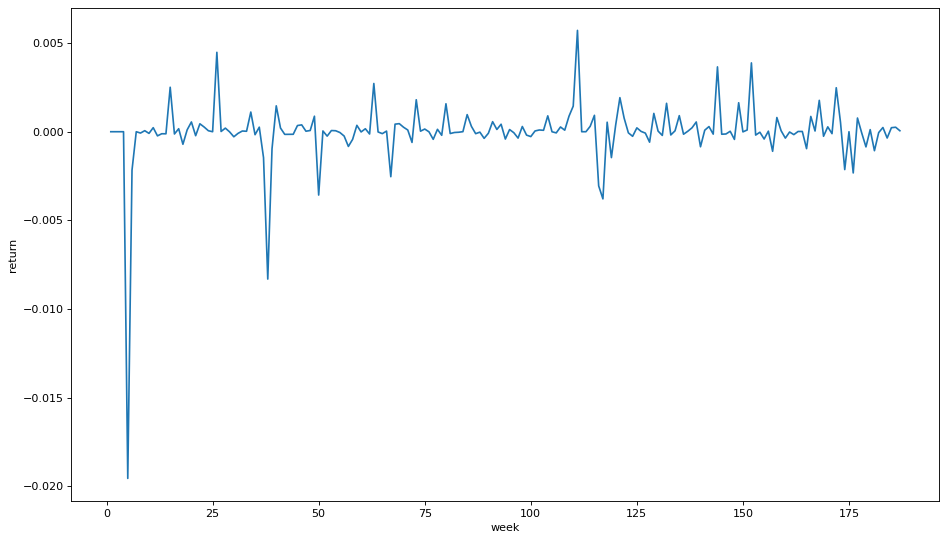

In [38]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)
x = [i for i in range(1, 188)]
plt.plot(x, return_list)
plt.xlabel("week")
plt.ylabel("return")